In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import nltk
import tensorflow as tf
from tensorflow import keras 
import numpy as np
from nltk.corpus import stopwords
#from google.colab import files 
from nltk.stem import PorterStemmer
import wordcloud 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import io
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from textblob import TextBlob 

In [3]:
#uploaded=files.upload()

First we import a known dataset for training our model. The airline sentiment data was used in this case. In summary, we will use the imported dataset to train a model, save and then use for the twitter data on covid-19 to classify whether the sentiment is positive, negative or neutral.  

In [4]:
df1=pd.read_csv('Tweets.csv')
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df1= df1[df1['airline_sentiment'] != 'neutral']
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


We then have to convert words into numbers since at a fundamental level, computers only understand numbers. TFIDF is a specific algorithm used to suppress the importance of commonly occurring words and phrases like "boy" and to amplify the importance of less occuring words like "inequality". In essence, the vector for "boy" is smaller than the vector used to represent "inequality".

In [6]:
tweets = df1.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)
vocab_size = len(tokenizer.word_index) + 1
vectorizer = tokenizer.texts_to_sequences(tweets)
pad = pad_sequences(vectorizer, maxlen=200)

And we then create a label

In [7]:
sentiment_label = df1.airline_sentiment.factorize()

We create an LSTM deep learning architecture

In [8]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           423488    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
_________________________________________________________________
None


And then train the model

In [9]:
history = model.fit(pad,sentiment_label[0],
                  validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 36s 126ms/step - loss: 0.4016 - accuracy: 0.8310 - val_loss: 0.2087 - val_accuracy: 0.9155
Epoch 2/5
289/289 [==============================] - 41s 141ms/step - loss: 0.2200 - accuracy: 0.9154 - val_loss: 0.1590 - val_accuracy: 0.9450
Epoch 3/5
289/289 [==============================] - 41s 143ms/step - loss: 0.1597 - accuracy: 0.9392 - val_loss: 0.1621 - val_accuracy: 0.9428
Epoch 4/5
289/289 [==============================] - 41s 143ms/step - loss: 0.1345 - accuracy: 0.9493 - val_loss: 0.1701 - val_accuracy: 0.9411
Epoch 5/5
289/289 [==============================] - 43s 149ms/step - loss: 0.1152 - accuracy: 0.9584 - val_loss: 0.1915 - val_accuracy: 0.9437


Separate the columns of interest

In [10]:
df3=df1[['text','airline_sentiment']]
df3

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative
14634,@AmericanAir right on cue with the delays👌,negative
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative


Let us now create an empty column to be populated with the degree of sentiment with all positive above zero and negatives below it.

In [11]:
df3['Python_Predictor']=""
df4=df3.reset_index(drop=True)
df4

<ipython-input-11-312eadf361c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Python_Predictor']=""


,text,airline_sentiment,Python_Predictor
0,@VirginAmerica plus you've added commercials t...,positive,
1,@VirginAmerica it's really aggressive to blast...,negative,
2,@VirginAmerica and it's a really big bad thing...,negative,
3,@VirginAmerica seriously would pay $30 a fligh...,negative,
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,
...,...,...,...
11536,@AmericanAir my flight was Cancelled Flightled...,negative,
11537,@AmericanAir right on cue with the delays👌,negative,
11538,@AmericanAir thank you we got on a different f...,positive,
11539,@AmericanAir leaving over 20 minutes Late Flig...,negative,


The newly created column is then populated using a python library known as **TextBlob**

In [12]:
for i in range(11541):
  df4['Python_Predictor'].loc[i]=TextBlob(str(df4['text'].loc[i])).polarity
df4

,text,airline_sentiment,Python_Predictor
0,@VirginAmerica plus you've added commercials t...,positive,0.0
1,@VirginAmerica it's really aggressive to blast...,negative,0.00625
2,@VirginAmerica and it's a really big bad thing...,negative,-0.35
3,@VirginAmerica seriously would pay $30 a fligh...,negative,-0.208333
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,0.466667
...,...,...,...
11536,@AmericanAir my flight was Cancelled Flightled...,negative,0.0
11537,@AmericanAir right on cue with the delays👌,negative,0.285714
11538,@AmericanAir thank you we got on a different f...,positive,0.0
11539,@AmericanAir leaving over 20 minutes Late Flig...,negative,-0.3


Create a real sentiment column and confirm that it has been created

In [13]:
df4['real_sentiment']=''

In [14]:
for i in range(11541):
  if df4['airline_sentiment'].loc[i]=='positive':
    df4['real_sentiment'].loc[i]=1
  elif df4['airline_sentiment'].loc[i]=='negative':
    df4['real_sentiment'].loc[i]=-1
  else:
    df4['real_sentiment']=0


In [15]:
df4

,text,airline_sentiment,Python_Predictor,real_sentiment
0,@VirginAmerica plus you've added commercials t...,positive,0.0,1
1,@VirginAmerica it's really aggressive to blast...,negative,0.00625,-1
2,@VirginAmerica and it's a really big bad thing...,negative,-0.35,-1
3,@VirginAmerica seriously would pay $30 a fligh...,negative,-0.208333,-1
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,0.466667,1
...,...,...,...,...
11536,@AmericanAir my flight was Cancelled Flightled...,negative,0.0,-1
11537,@AmericanAir right on cue with the delays👌,negative,0.285714,-1
11538,@AmericanAir thank you we got on a different f...,positive,0.0,1
11539,@AmericanAir leaving over 20 minutes Late Flig...,negative,-0.3,-1


Create a column known as 'intergised' to be filled with magnitude of the sentiments

In [16]:
df4['integised']=''

In [17]:
for i in range(11541):
  df4['integised'].loc[i]=int(df4['Python_Predictor'].loc[i]*100)

In [18]:
df4

,text,airline_sentiment,Python_Predictor,real_sentiment,integised
0,@VirginAmerica plus you've added commercials t...,positive,0.0,1,0
1,@VirginAmerica it's really aggressive to blast...,negative,0.00625,-1,0
2,@VirginAmerica and it's a really big bad thing...,negative,-0.35,-1,-34
3,@VirginAmerica seriously would pay $30 a fligh...,negative,-0.208333,-1,-20
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,0.466667,1,46
...,...,...,...,...,...
11536,@AmericanAir my flight was Cancelled Flightled...,negative,0.0,-1,0
11537,@AmericanAir right on cue with the delays👌,negative,0.285714,-1,28
11538,@AmericanAir thank you we got on a different f...,positive,0.0,1,0
11539,@AmericanAir leaving over 20 minutes Late Flig...,negative,-0.3,-1,-30


In [19]:
df4['Three']=''

In [20]:
for i in range(11541):
  if df4['integised'].loc[i] > 0:
    df4['Three'].loc[i]=1
  elif df4['integised'].loc[i] == 0:
    df4['Three'].loc[i]=0
  else:
    df4['Three'].loc[i]=-1

In [21]:

df4

,text,airline_sentiment,Python_Predictor,real_sentiment,integised,Three
0,@VirginAmerica plus you've added commercials t...,positive,0.0,1,0,0
1,@VirginAmerica it's really aggressive to blast...,negative,0.00625,-1,0,0
2,@VirginAmerica and it's a really big bad thing...,negative,-0.35,-1,-34,-1
3,@VirginAmerica seriously would pay $30 a fligh...,negative,-0.208333,-1,-20,-1
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,0.466667,1,46,1
...,...,...,...,...,...,...
11536,@AmericanAir my flight was Cancelled Flightled...,negative,0.0,-1,0,0
11537,@AmericanAir right on cue with the delays👌,negative,0.285714,-1,28,1
11538,@AmericanAir thank you we got on a different f...,positive,0.0,1,0,0
11539,@AmericanAir leaving over 20 minutes Late Flig...,negative,-0.3,-1,-30,-1


In [22]:
df4['real_sentiment']=np.float64(df4['real_sentiment'])
df4['Three']=np.float64(df4['Three'])
df4['Three'].corr(df4['real_sentiment'])

0.38838309499816875

### Applying the Airline sentiments LSTM model on the Covid-19 Tweet Data

In [26]:
uploaded2=files.upload()

NameError: name 'files' is not defined

First, let us import the tweets

In [28]:
df1=pd.read_csv('devolution_tweets_jan.csv')
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


### Experimenting on previously used data

In [37]:
df=pd.read_json('tweets1.json',lines=True)

In [38]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,2021-02-09 10:25:39+00:00,1359086049788502016,1359086049788502016,5Gやんアキバ https://t.co/FrI9PXJSNl,False,"[0, 7]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1359086040598802434, 'id_str...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,0.0,ja,NaN,NaN,NaN,NaN,NaN
1,2021-02-09 10:25:33+00:00,1359086024773652485,1359086024773652480,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...,False,"[0, 140]","{'hashtags': [{'text': '4つの快適が加速するキャンペーン', 'in...",NaN,"{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,NaN,ja,{'created_at': 'Wed Feb 03 01:00:00 +0000 2021...,NaN,NaN,NaN,NaN
2,2021-02-09 10:25:32+00:00,1359086018281025538,1359086018281025536,RT @Fiyi_Oladimeji: Naija will say you can onl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,NaN,en,{'created_at': 'Tue Feb 09 06:53:48 +0000 2021...,1.358960e+18,1.358960e+18,NaN,NaN
3,2021-02-09 10:25:31+00:00,1359086017932709890,1359086017932709888,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...,False,"[0, 140]","{'hashtags': [{'text': '4つの快適が加速するキャンペーン', 'in...",NaN,"{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,NaN,ja,{'created_at': 'Wed Feb 03 01:00:00 +0000 2021...,NaN,NaN,NaN,NaN
4,2021-02-09 10:25:30+00:00,1359086009955348483,1359086009955348480,RT @TechNative: Lee Hines at @HPE details the ...,False,"[0, 140]","{'hashtags': [{'text': '5G', 'indices': [82, 8...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,0.0,en,{'created_at': 'Tue Feb 09 09:33:00 +0000 2021...,NaN,NaN,NaN,NaN


In [39]:
df['entities'].loc[1]

{'hashtags': [{'text': '4つの快適が加速するキャンペーン', 'indices': [41, 58]},
  {'text': 'RTキャンペーン', 'indices': [62, 71]},
  {'text': 'arrowsNX9', 'indices': [125, 135]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'FujitsuMOBILE',
   'name': '富士通コネクテッドテクノロジーズ',
   'id': 374304800,
   'id_str': '374304800',
   'indices': [3, 17]}],
 'urls': []}

In [40]:
df1=df.geo.dropna()
df1


15329    {'type': 'Point', 'coordinates': [45.4215296, ...
17853    {'type': 'Point', 'coordinates': [47.6101153, ...
Name: geo, dtype: object

In [41]:
df.geo

0        None
1        None
2        None
3        None
4        None
         ... 
19788    None
19789    None
19790    None
19791    None
19792    None
Name: geo, Length: 19793, dtype: object

In [42]:
df2=df.full_text

In [43]:
df2

0                          5Gやんアキバ https://t.co/FrI9PXJSNl
1        RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
2        RT @Fiyi_Oladimeji: Naija will say you can onl...
3        RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
4        RT @TechNative: Lee Hines at @HPE details the ...
                               ...                        
19788    RT @Verizon: Squad lagging out? We got you! \n...
19789    RT @TMobile: Don't trust big decisions to just...
19790    @neuro_p_salinas @rafa_cavada Y el chip 5G, to...
19791    RT @neuro_p_salinas: Listo con la vacuna\nFoto...
19792    Oh, you have a 5G phone? That's cute https://t...
Name: full_text, Length: 19793, dtype: object

In [44]:
df2=pd.DataFrame(df2)
df2


,full_text
0,5Gやんアキバ https://t.co/FrI9PXJSNl
1,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
2,RT @Fiyi_Oladimeji: Naija will say you can onl...
3,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
4,RT @TechNative: Lee Hines at @HPE details the ...
...,...
19788,RT @Verizon: Squad lagging out? We got you! \n...
19789,RT @TMobile: Don't trust big decisions to just...
19790,"@neuro_p_salinas @rafa_cavada Y el chip 5G, to..."
19791,RT @neuro_p_salinas: Listo con la vacuna\nFoto...


In [45]:
df2=df2['full_text'].dropna()
df2

0                          5Gやんアキバ https://t.co/FrI9PXJSNl
1        RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
2        RT @Fiyi_Oladimeji: Naija will say you can onl...
3        RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
4        RT @TechNative: Lee Hines at @HPE details the ...
                               ...                        
19788    RT @Verizon: Squad lagging out? We got you! \n...
19789    RT @TMobile: Don't trust big decisions to just...
19790    @neuro_p_salinas @rafa_cavada Y el chip 5G, to...
19791    RT @neuro_p_salinas: Listo con la vacuna\nFoto...
19792    Oh, you have a 5G phone? That's cute https://t...
Name: full_text, Length: 19793, dtype: object

In [46]:
df2=pd.DataFrame(df2)
df2

,full_text
0,5Gやんアキバ https://t.co/FrI9PXJSNl
1,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
2,RT @Fiyi_Oladimeji: Naija will say you can onl...
3,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...
4,RT @TechNative: Lee Hines at @HPE details the ...
...,...
19788,RT @Verizon: Squad lagging out? We got you! \n...
19789,RT @TMobile: Don't trust big decisions to just...
19790,"@neuro_p_salinas @rafa_cavada Y el chip 5G, to..."
19791,RT @neuro_p_salinas: Listo con la vacuna\nFoto...


In [47]:
df2['Retweet']=""

In [49]:
for i in range(19793):
  if str('RT') in str(df2['full_text'].loc[i]):
    df2['Retweet'].loc[i]='Yes'
  else:
    df2['Retweet'].loc[i]='No'
  

In [50]:
df2

,full_text,Retweet
0,5Gやんアキバ https://t.co/FrI9PXJSNl,No
1,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...,Yes
2,RT @Fiyi_Oladimeji: Naija will say you can onl...,Yes
3,RT @FujitsuMOBILE: 5G端末 arrows NX9 F-52A\n#4つの...,Yes
4,RT @TechNative: Lee Hines at @HPE details the ...,Yes
...,...,...
19788,RT @Verizon: Squad lagging out? We got you! \n...,Yes
19789,RT @TMobile: Don't trust big decisions to just...,Yes
19790,"@neuro_p_salinas @rafa_cavada Y el chip 5G, to...",No
19791,RT @neuro_p_salinas: Listo con la vacuna\nFoto...,Yes


In [51]:
df3=df2[df2.Retweet=='No']
df3

,full_text,Retweet
0,5Gやんアキバ https://t.co/FrI9PXJSNl,No
5,5G trials in India could start in the next 2-3...,No
6,Très heureux qu’Olivier Véran soit désormais é...,No
8,@FrankaOreb Zelim bilo koje da vise dobijem ta...,No
12,"@NaKitiMiBor Drugi hibridni rat, 5G u službi i...",No
...,...,...
19782,@Havocx1x @5G_GamingLLC 🥳🥳,No
19785,@Orange_France Bande de vendus! 5G = de la mer...,No
19787,#楽天モバイル\n#ドラクエウォーク \n小平から花小金井まで電車に乗っていたりその地域に行...,No
19790,"@neuro_p_salinas @rafa_cavada Y el chip 5G, to...",No


In [52]:
df3['Language']=""
df3

<ipython-input-52-cf1bde37d50e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Language']=""


,full_text,Retweet,Language
0,5Gやんアキバ https://t.co/FrI9PXJSNl,No,
5,5G trials in India could start in the next 2-3...,No,
6,Très heureux qu’Olivier Véran soit désormais é...,No,
8,@FrankaOreb Zelim bilo koje da vise dobijem ta...,No,
12,"@NaKitiMiBor Drugi hibridni rat, 5G u službi i...",No,
...,...,...,...
19782,@Havocx1x @5G_GamingLLC 🥳🥳,No,
19785,@Orange_France Bande de vendus! 5G = de la mer...,No,
19787,#楽天モバイル\n#ドラクエウォーク \n小平から花小金井まで電車に乗っていたりその地域に行...,No,
19790,"@neuro_p_salinas @rafa_cavada Y el chip 5G, to...",No,


In [53]:
from langdetect import detect

In [55]:
df3=df3.reset_index(drop=True)
df3

,full_text,Retweet,Language
0,5Gやんアキバ https://t.co/FrI9PXJSNl,No,
1,5G trials in India could start in the next 2-3...,No,
2,Très heureux qu’Olivier Véran soit désormais é...,No,
3,@FrankaOreb Zelim bilo koje da vise dobijem ta...,No,
4,"@NaKitiMiBor Drugi hibridni rat, 5G u službi i...",No,
...,...,...,...
6156,@Havocx1x @5G_GamingLLC 🥳🥳,No,
6157,@Orange_France Bande de vendus! 5G = de la mer...,No,
6158,#楽天モバイル\n#ドラクエウォーク \n小平から花小金井まで電車に乗っていたりその地域に行...,No,
6159,"@neuro_p_salinas @rafa_cavada Y el chip 5G, to...",No,


In [56]:
for i in range(6161):
  try:
    df3['Language'].loc[i]=detect(str(df3['full_text'].loc[i]))
  except:
    df3['Language'].loc[i]='Error'

In [57]:
df3

,full_text,Retweet,Language
0,5Gやんアキバ https://t.co/FrI9PXJSNl,No,ja
1,5G trials in India could start in the next 2-3...,No,en
2,Très heureux qu’Olivier Véran soit désormais é...,No,fr
3,@FrankaOreb Zelim bilo koje da vise dobijem ta...,No,hr
4,"@NaKitiMiBor Drugi hibridni rat, 5G u službi i...",No,hr
...,...,...,...
6156,@Havocx1x @5G_GamingLLC 🥳🥳,No,sv
6157,@Orange_France Bande de vendus! 5G = de la mer...,No,fr
6158,#楽天モバイル\n#ドラクエウォーク \n小平から花小金井まで電車に乗っていたりその地域に行...,No,ja
6159,"@neuro_p_salinas @rafa_cavada Y el chip 5G, to...",No,es


In [58]:
df4=df3[df3['Language']=='en']
df4

,full_text,Retweet,Language
1,5G trials in India could start in the next 2-3...,No,en
5,"#Startups, @orange challenges you to enrich th...",No,en
9,"#5G #technology &amp; #pakistan , will #Pakist...",No,en
14,@stufflistings When A72 5g is coming??,No,en
19,@MrPhoneTech @stufflistings Matlab note searie...,No,en
...,...,...,...
6145,@O2 why do people have to pay top dollar in e...,No,en
6147,@YoXLR @5G_GamingLLC congrats :3,No,en
6151,5G Fixed Wireless Access Market 2021-2027 Size...,No,en
6153,"@wanganuiorg @ConanMcKegg @dannews ""plenty of ...",No,en


In [59]:
text=''.join(words for words in df4['full_text'])

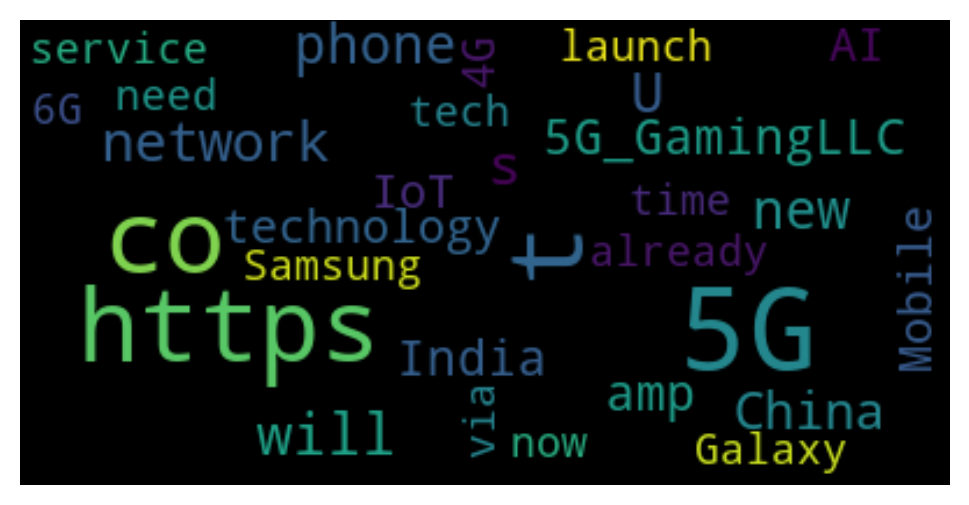

<Figure size 432x288 with 0 Axes>

In [78]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=30, background_color="black",collocations=False).generate(text)
plt.figure(dpi=200)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('gender_wordcloud.png')

In [62]:
vectorizer=TfidfVectorizer(stop_words='english')

In [63]:
X2=vectorizer.fit_transform(df4['full_text'])

In [64]:
X2

<2094x10079 sparse matrix of type '<class 'numpy.float64'>'
	with 31590 stored elements in Compressed Sparse Row format>

In [65]:
true_k=3
model=KMeans(n_clusters=true_k,init="k-means++",max_iter=100,n_init=1)
model.fit(X2)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [66]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()


In [67]:

for i in range(true_k):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :10]:
  print(' %s' % terms[ind])

Cluster 0:
 fighting
 dominance
 forget
 6g
 china
 https
 5g
 scmpnews
 yahoo
 technology
Cluster 1:
 5g_gamingllc
 havocx1x
 yoxlr
 versenaw
 revo5g
 cnnrawp
 zexle_
 blitxo
 qtsalt
 asentrit
Cluster 2:
 5g
 https
 india
 phone
 new
 network
 samsung
 mobile
 technology
 amp


In [68]:
y_clf=model.fit_predict(X2)

In [69]:
df11=pd.DataFrame(y_clf)
df11

,0
0,1
1,1
2,1
3,1
4,1
...,...
2089,1
2090,2
2091,1
2092,1


In [70]:
df7=df11.groupby([0]).size().reset_index(name="number")

In [71]:
df7

,0,number
0,0,45
1,1,1930
2,2,119


In [72]:
from sklearn.decomposition import TruncatedSVD

In [73]:
svd=TruncatedSVD(n_components=3)

In [74]:
X3=svd.fit_transform(X2)

In [75]:
X3.shape

(2094, 3)

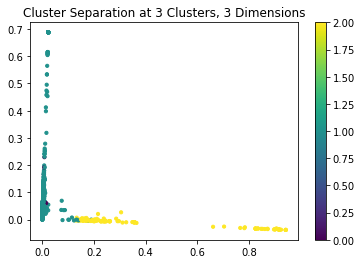

In [77]:
plt.scatter(X3[:,0], X3[:,1], c=y_clf, s=10, cmap='viridis')
plt.colorbar()
plt.title('Cluster Separation at 3 Clusters, 3 Dimensions')
plt.savefig('Cluster3.png')

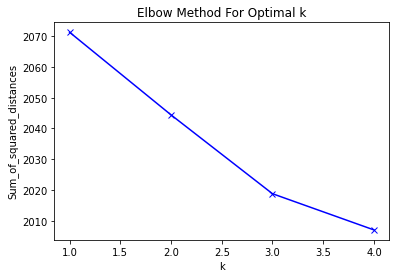

In [79]:

Sum_of_squared_distances = []
K = range(1,5,1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    Sum_of_squared_distances.append(km.inertia_)




plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [80]:
from textblob import TextBlob

In [81]:
df4['Polarity']=""

<ipython-input-81-ad24116c3dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Polarity']=""


In [82]:
df4

,full_text,Retweet,Language,Polarity
1,5G trials in India could start in the next 2-3...,No,en,
5,"#Startups, @orange challenges you to enrich th...",No,en,
9,"#5G #technology &amp; #pakistan , will #Pakist...",No,en,
14,@stufflistings When A72 5g is coming??,No,en,
19,@MrPhoneTech @stufflistings Matlab note searie...,No,en,
...,...,...,...,...
6145,@O2 why do people have to pay top dollar in e...,No,en,
6147,@YoXLR @5G_GamingLLC congrats :3,No,en,
6151,5G Fixed Wireless Access Market 2021-2027 Size...,No,en,
6153,"@wanganuiorg @ConanMcKegg @dannews ""plenty of ...",No,en,


In [84]:
df4=df4.reset_index(drop=True)
for i in range(2094):
  df4['Polarity'].loc[i]=TextBlob(str(df4['full_text'].loc[i])).polarity

In [ ]:
df4

In [ ]:
df4.integised=""

In [ ]:
df4['integised']=""

In [ ]:
for i in range(20982):
  df4['integised'].loc[i]=int(df4['Polarity'].loc[i]*100)


In [ ]:
df4

In [ ]:
df5=df4.groupby('integised').size().reset_index(name='Number')
df5

In [ ]:
df5.plot(x='integised', y='Number')
plt.title('Sentiment on Gender Tweets by Textblob')
plt.savefig('Gender_Textblob.png')
files.download('Gender_Textblob.png')

# GEO CODING

In [3]:

df=pd.read_json('tweets_hydratedd.json',lines=True)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope
0,2020-01-04 00:03:43+00:00,1213249613735460865,1213249613735460864,Coronavirus | Human Coronavirus Types | CDC ht...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-04 05:23:50+00:00,1213330173736738817,1213330173736738816,"@shehryar_taseer That’s 💯 true , \nCorona viru...",False,"[17, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.212680e+18,1.212680e+18,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 14:54:46+00:00,1214198629553950721,1214198629553950720,"TLDR: Not SARS, possibly new coronavirus. Diff...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08 14:30:20+00:00,1214917256414662656,1214917256414662656,Disease outbreak news from the WHO: Middle Eas...,False,"[0, 142]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 18:35:16+00:00,1214978895914684418,1214978895914684416,China - Media: WSJ says sources tell them myst...,False,"[0, 170]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122563,2020-01-28 07:24:53+00:00,1222057945120178177,1222057945120178176,the coronavirus is at usc https://t.co/5nqJw9bP7i,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,"{'media': [{'id': 1222057941328523264, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN
122564,2020-01-28 07:24:55+00:00,1222057955119575043,1222057955119575040,Lessons from the 1918 flu https://t.co/8MKjcUe...,False,"[0, 251]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,0.0,fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122565,2020-01-28 07:24:55+00:00,1222057955274776577,1222057955274776576,Le marché de Wuhan est couvert. https://t.co/2...,False,"[0, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,fr,NaN,1.221787e+18,1.221787e+18,"{'url': 'https://t.co/2jDenECcXu', 'expanded':...",NaN,NaN,NaN
122566,2020-01-28 07:24:56+00:00,1222057956268761089,1222057956268761088,Ministerul Sănătății - Pacientul din Bacău nu ...,False,"[0, 116]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,False,0.0,ro,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1=pd.DataFrame(df)

In [5]:
df1

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope
0,2020-01-04 00:03:43+00:00,1213249613735460865,1213249613735460864,Coronavirus | Human Coronavirus Types | CDC ht...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-04 05:23:50+00:00,1213330173736738817,1213330173736738816,"@shehryar_taseer That’s 💯 true , \nCorona viru...",False,"[17, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.212680e+18,1.212680e+18,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 14:54:46+00:00,1214198629553950721,1214198629553950720,"TLDR: Not SARS, possibly new coronavirus. Diff...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08 14:30:20+00:00,1214917256414662656,1214917256414662656,Disease outbreak news from the WHO: Middle Eas...,False,"[0, 142]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 18:35:16+00:00,1214978895914684418,1214978895914684416,China - Media: WSJ says sources tell them myst...,False,"[0, 170]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122563,2020-01-28 07:24:53+00:00,1222057945120178177,1222057945120178176,the coronavirus is at usc https://t.co/5nqJw9bP7i,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,"{'media': [{'id': 1222057941328523264, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN
122564,2020-01-28 07:24:55+00:00,1222057955119575043,1222057955119575040,Lessons from the 1918 flu https://t.co/8MKjcUe...,False,"[0, 251]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,0.0,fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122565,2020-01-28 07:24:55+00:00,1222057955274776577,1222057955274776576,Le marché de Wuhan est couvert. https://t.co/2...,False,"[0, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,fr,NaN,1.221787e+18,1.221787e+18,"{'url': 'https://t.co/2jDenECcXu', 'expanded':...",NaN,NaN,NaN
122566,2020-01-28 07:24:56+00:00,1222057956268761089,1222057956268761088,Ministerul Sănătății - Pacientul din Bacău nu ...,False,"[0, 116]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,False,0.0,ro,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2=df1[df1['lang']=='en']
df1

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope
0,2020-01-04 00:03:43+00:00,1213249613735460865,1213249613735460864,Coronavirus | Human Coronavirus Types | CDC ht...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-04 05:23:50+00:00,1213330173736738817,1213330173736738816,"@shehryar_taseer That’s 💯 true , \nCorona viru...",False,"[17, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.212680e+18,1.212680e+18,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 14:54:46+00:00,1214198629553950721,1214198629553950720,"TLDR: Not SARS, possibly new coronavirus. Diff...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08 14:30:20+00:00,1214917256414662656,1214917256414662656,Disease outbreak news from the WHO: Middle Eas...,False,"[0, 142]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 18:35:16+00:00,1214978895914684418,1214978895914684416,China - Media: WSJ says sources tell them myst...,False,"[0, 170]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122563,2020-01-28 07:24:53+00:00,1222057945120178177,1222057945120178176,the coronavirus is at usc https://t.co/5nqJw9bP7i,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,"{'media': [{'id': 1222057941328523264, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN
122564,2020-01-28 07:24:55+00:00,1222057955119575043,1222057955119575040,Lessons from the 1918 flu https://t.co/8MKjcUe...,False,"[0, 251]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,0.0,fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122565,2020-01-28 07:24:55+00:00,1222057955274776577,1222057955274776576,Le marché de Wuhan est couvert. https://t.co/2...,False,"[0, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,fr,NaN,1.221787e+18,1.221787e+18,"{'url': 'https://t.co/2jDenECcXu', 'expanded':...",NaN,NaN,NaN
122566,2020-01-28 07:24:56+00:00,1222057956268761089,1222057956268761088,Ministerul Sănătății - Pacientul din Bacău nu ...,False,"[0, 116]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,False,0.0,ro,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope
1,2020-01-04 05:23:50+00:00,1213330173736738817,1213330173736738816,"@shehryar_taseer That’s 💯 true , \nCorona viru...",False,"[17, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.212680e+18,1.212680e+18,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 14:54:46+00:00,1214198629553950721,1214198629553950720,"TLDR: Not SARS, possibly new coronavirus. Diff...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08 14:30:20+00:00,1214917256414662656,1214917256414662656,Disease outbreak news from the WHO: Middle Eas...,False,"[0, 142]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 18:35:16+00:00,1214978895914684418,1214978895914684416,China - Media: WSJ says sources tell them myst...,False,"[0, 170]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-08 21:50:27+00:00,1215028015438192640,1215028015438192640,The mystery new virus causing #China pneumonia...,False,"[0, 260]","{'hashtags': [{'text': 'China', 'indices': [30...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122555,2020-01-28 07:24:48+00:00,1222057924362551296,1222057924362551296,We can blame wuhan all we want but it’s among ...,False,"[0, 53]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122561,2020-01-28 07:24:52+00:00,1222057942201126913,1222057942201126912,What is the source of 2019 Novel Coronavirus? ...,False,"[0, 227]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122562,2020-01-28 07:24:52+00:00,1222057942410768384,1222057942410768384,China confirms 106 deaths as coronavirus sprea...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,1.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122563,2020-01-28 07:24:53+00:00,1222057945120178177,1222057945120178176,the coronavirus is at usc https://t.co/5nqJw9bP7i,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,"{'media': [{'id': 1222057941328523264, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2=df2.reset_index(drop=True)

In [9]:
df2

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope
0,2020-01-04 05:23:50+00:00,1213330173736738817,1213330173736738816,"@shehryar_taseer That’s 💯 true , \nCorona viru...",False,"[17, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.212680e+18,1.212680e+18,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06 14:54:46+00:00,1214198629553950721,1214198629553950720,"TLDR: Not SARS, possibly new coronavirus. Diff...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-08 14:30:20+00:00,1214917256414662656,1214917256414662656,Disease outbreak news from the WHO: Middle Eas...,False,"[0, 142]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08 18:35:16+00:00,1214978895914684418,1214978895914684416,China - Media: WSJ says sources tell them myst...,False,"[0, 170]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 21:50:27+00:00,1215028015438192640,1215028015438192640,The mystery new virus causing #China pneumonia...,False,"[0, 260]","{'hashtags': [{'text': 'China', 'indices': [30...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68073,2020-01-28 07:24:48+00:00,1222057924362551296,1222057924362551296,We can blame wuhan all we want but it’s among ...,False,"[0, 53]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68074,2020-01-28 07:24:52+00:00,1222057942201126913,1222057942201126912,What is the source of 2019 Novel Coronavirus? ...,False,"[0, 227]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68075,2020-01-28 07:24:52+00:00,1222057942410768384,1222057942410768384,China confirms 106 deaths as coronavirus sprea...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,1.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68076,2020-01-28 07:24:53+00:00,1222057945120178177,1222057945120178176,the coronavirus is at usc https://t.co/5nqJw9bP7i,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,0.0,en,"{'media': [{'id': 1222057941328523264, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2['devolution']=""

In [11]:
for i in range(68078):
  if str('') in str(df2['full_text'].loc[i]):
    df2['devolution'].loc[i]='Yes'
  else:  
    df2['devolution'].loc[i]='No'


/home/makavelli/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df3=df2.groupby('devolution').size().reset_index(name='Number')

In [13]:
df3

,devolution,Number
0,Yes,68078


In [14]:
import textblob

In [15]:
df2['polarity']=""
for i in range(68078):
  df2['polarity'].loc[i]=TextBlob(df2['full_text'].loc[i]).polarity

/home/makavelli/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
df2.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,withheld_in_countries,withheld_scope,devolution,polarity
0,2020-01-04 05:23:50+00:00,1213330173736738817,1213330173736738816,"@shehryar_taseer That’s 💯 true , \nCorona viru...",False,"[17, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.212680e+18,1.212680e+18,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.008333
1,2020-01-06 14:54:46+00:00,1214198629553950721,1214198629553950720,"TLDR: Not SARS, possibly new coronavirus. Diff...",False,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,-0.087013
2,2020-01-08 14:30:20+00:00,1214917256414662656,1214917256414662656,Disease outbreak news from the WHO: Middle Eas...,False,"[0, 142]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.0
3,2020-01-08 18:35:16+00:00,1214978895914684418,1214978895914684416,China - Media: WSJ says sources tell them myst...,False,"[0, 170]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.136364
4,2020-01-08 21:50:27+00:00,1215028015438192640,1215028015438192640,The mystery new virus causing #China pneumonia...,False,"[0, 260]","{'hashtags': [{'text': 'China', 'indices': [30...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.090909


In [17]:
df2['integised']=""
for i in range(68078):
  df2['integised'].loc[i]=int(df2['polarity'].loc[i]*100)

/home/makavelli/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
df5=df2.groupby('integised').size().reset_index(name='number')

<AxesSubplot:xlabel='integised'>

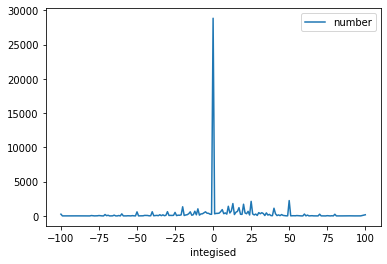

In [19]:
df5.plot(x='integised',y='number',kind='line')

In [20]:
df5

,integised,number
0,-100,256
1,-99,4
2,-97,8
3,-93,2
4,-90,15
...,...,...
172,87,14
173,90,14
174,93,4
175,97,7


In [21]:
df5.loc[88]

integised        0
number       28854
Name: 88, dtype: int64

In [22]:
df2['entities'].loc[1]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'statnews',
   'name': 'STAT',
   'id': 3290364847,
   'id_str': '3290364847',
   'indices': [263, 272]}],
 'urls': [{'url': 'https://t.co/vIeVhPptIP',
   'expanded_url': 'https://www.statnews.com/2020/01/04/mystery-pneumonia-outbreak-china/',
   'display_url': 'statnews.com/2020/01/04/mys…',
   'indices': [235, 258]}]}

In [23]:
df6=df2.place.dropna()

In [24]:
df6[151]

{'id': '01864a8a64df9dc4',
 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json',
 'place_type': 'city',
 'name': 'Melbourne',
 'full_name': 'Melbourne, Victoria',
 'country_code': 'AU',
 'country': 'Australia',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[144.593741856, -38.433859306],
    [145.512528832, -38.433859306],
    [145.512528832, -37.5112737225],
    [144.593741856, -37.5112737225]]]},
 'attributes': {}}

In [25]:
df6.loc[151]

{'id': '01864a8a64df9dc4',
 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json',
 'place_type': 'city',
 'name': 'Melbourne',
 'full_name': 'Melbourne, Victoria',
 'country_code': 'AU',
 'country': 'Australia',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[144.593741856, -38.433859306],
    [145.512528832, -38.433859306],
    [145.512528832, -37.5112737225],
    [144.593741856, -37.5112737225]]]},
 'attributes': {}}

In [26]:
len(df6)

1651

In [27]:
df2.user.loc[1]

{'id': 382391949,
 'id_str': '382391949',
 'name': 'Dr. Jessica Taaffe',
 'screen_name': 'JessicaTaaffe',
 'location': '',
 'description': 'RENAISSANCE WOMAN: Biomed PhD|Singer|Global Health Scientist| 1/2 Paraguayan| Dancing queen|@IfThenSheCan Amb| Couture lover|German Shepherd mom|Gypset|My Views',
 'url': 'https://t.co/wYiO4jnaQl',
 'entities': {'url': {'urls': [{'url': 'https://t.co/wYiO4jnaQl',
     'expanded_url': 'http://jessicataaffe.com/',
     'display_url': 'jessicataaffe.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 2236,
 'friends_count': 1106,
 'listed_count': 145,
 'created_at': 'Fri Sep 30 00:21:18 +0000 2011',
 'favourites_count': 8869,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 28189,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'EBEBEB',
 'profile_background_i

In [28]:
text=''.join(words for words in df2['full_text'])

In [29]:
df6[151]

{'id': '01864a8a64df9dc4',
 'url': 'https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json',
 'place_type': 'city',
 'name': 'Melbourne',
 'full_name': 'Melbourne, Victoria',
 'country_code': 'AU',
 'country': 'Australia',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[144.593741856, -38.433859306],
    [145.512528832, -38.433859306],
    [145.512528832, -37.5112737225],
    [144.593741856, -37.5112737225]]]},
 'attributes': {}}

In [30]:
df7=pd.DataFrame(df6)

In [31]:
df7

,place
151,"{'id': '01864a8a64df9dc4', 'url': 'https://api..."
165,"{'id': '01a743d720b87387', 'url': 'https://api..."
179,"{'id': '00045a8c33174826', 'url': 'https://api..."
186,"{'id': '45a45eb8e30e7b14', 'url': 'https://api..."
198,"{'id': 'd66ca907ceb62690', 'url': 'https://api..."
...,...
67790,"{'id': '1e5cb4d0509db554', 'url': 'https://api..."
67811,"{'id': '2615344c84ed87ee', 'url': 'https://api..."
67859,"{'id': '5a110d312052166f', 'url': 'https://api..."
67960,"{'id': '002f479379291074', 'url': 'https://api..."


In [32]:
df7=df7.reset_index(drop=True)

In [33]:
df7

,place
0,"{'id': '01864a8a64df9dc4', 'url': 'https://api..."
1,"{'id': '01a743d720b87387', 'url': 'https://api..."
2,"{'id': '00045a8c33174826', 'url': 'https://api..."
3,"{'id': '45a45eb8e30e7b14', 'url': 'https://api..."
4,"{'id': 'd66ca907ceb62690', 'url': 'https://api..."
...,...
1646,"{'id': '1e5cb4d0509db554', 'url': 'https://api..."
1647,"{'id': '2615344c84ed87ee', 'url': 'https://api..."
1648,"{'id': '5a110d312052166f', 'url': 'https://api..."
1649,"{'id': '002f479379291074', 'url': 'https://api..."


In [34]:
df7.loc[0]

place    {'id': '01864a8a64df9dc4', 'url': 'https://api...
Name: 0, dtype: object

In [38]:
for i in range(1651):
  df7['place'].loc[i]=str(df7['place'].loc[i])

In [39]:
type(df7['place'].loc[i])

str

In [40]:
df8=df7['place'].apply(lambda x: pd.Series(x.split(':')))
df8

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{'id',"'01864a8a64df9dc4', 'url'",'https,//api.twitter.com/1.1/geo/id/01864a8a64df9dc4....,"'city', 'name'","'Melbourne', 'full_name'","'Melbourne, Victoria', 'country_code'","'AU', 'country'","'Australia', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[144.593741856, -38.433859306], [145.512528...",{}},NaN,NaN
1,{'id',"'01a743d720b87387', 'url'",'https,//api.twitter.com/1.1/geo/id/01a743d720b87387....,"'city', 'name'","'Larkfield', 'full_name'","'Larkfield, CA', 'country_code'","'US', 'country'","'United States', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[-122.787492, 38.488502], [-122.718349, 38....",{}},NaN,NaN
2,{'id',"'00045a8c33174826', 'url'",'https,//api.twitter.com/1.1/geo/id/00045a8c33174826....,"'city', 'name'","'Thanon Nakhon Chai Si', 'full_name'","'Thanon Nakhon Chai Si, Thailand', 'country_c...","'TH', 'country'","'Thailand', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[100.5057265, 13.7741202], [100.5370861, 13...",{}},NaN,NaN
3,{'id',"'45a45eb8e30e7b14', 'url'",'https,//api.twitter.com/1.1/geo/id/45a45eb8e30e7b14....,"'city', 'name'","'Little Rock', 'full_name'","'Little Rock, AR', 'country_code'","'US', 'country'","'United States', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[-92.5215951, 34.6259499], [-92.1630491, 34...",{}},NaN,NaN
4,{'id',"'d66ca907ceb62690', 'url'",'https,//api.twitter.com/1.1/geo/id/d66ca907ceb62690....,"'country', 'name'","'Jamaica', 'full_name'","'Jamaica', 'country_code'","'JM', 'country'","'Jamaica', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[-78.3688776, 17.7057855], [-76.183028, 17....",{}},NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,{'id',"'1e5cb4d0509db554', 'url'",'https,//api.twitter.com/1.1/geo/id/1e5cb4d0509db554....,"'city', 'name'","'Vancouver', 'full_name'","'Vancouver, British Columbia', 'country_code'","'CA', 'country'","'Canada', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[-123.224215, 49.19854], [-123.022947, 49.1...",{}},NaN,NaN
1647,{'id',"'2615344c84ed87ee', 'url'",'https,//api.twitter.com/1.1/geo/id/2615344c84ed87ee....,"'city', 'name'","'Oshawa', 'full_name'","'Oshawa, Ontario', 'country_code'","'CA', 'country'","'Canada', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[-78.959206, 43.614586], [-78.68523, 43.614...",{}},NaN,NaN
1648,{'id',"'5a110d312052166f', 'url'",'https,//api.twitter.com/1.1/geo/id/5a110d312052166f....,"'city', 'name'","'San Francisco', 'full_name'","'San Francisco, CA', 'country_code'","'US', 'country'","'United States', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[-122.514926, 37.708075], [-122.357031, 37....",{}},NaN,NaN
1649,{'id',"'002f479379291074', 'url'",'https,//api.twitter.com/1.1/geo/id/002f479379291074....,"'city', 'name'","'Phlap Phla', 'full_name'","'Phlap Phla, Thailand', 'country_code'","'TH', 'country'","'Thailand', 'contained_within'","[], 'bounding_box'",{'type',"'Polygon', 'coordinates'","[[[100.5961611, 13.7509623], [100.6305456, 13...",{}},NaN,NaN


In [41]:
df9=df8[8]

In [42]:
df9=pd.DataFrame(df9)

In [43]:
df9

,8
0,"'Australia', 'contained_within'"
1,"'United States', 'contained_within'"
2,"'Thailand', 'contained_within'"
3,"'United States', 'contained_within'"
4,"'Jamaica', 'contained_within'"
...,...
1646,"'Canada', 'contained_within'"
1647,"'Canada', 'contained_within'"
1648,"'United States', 'contained_within'"
1649,"'Thailand', 'contained_within'"


In [44]:
df10=df9[8].apply(lambda x: pd.Series(x.split(',')))
df10

,0,1,2
0,'Australia','contained_within',NaN
1,'United States','contained_within',NaN
2,'Thailand','contained_within',NaN
3,'United States','contained_within',NaN
4,'Jamaica','contained_within',NaN
...,...,...,...
1646,'Canada','contained_within',NaN
1647,'Canada','contained_within',NaN
1648,'United States','contained_within',NaN
1649,'Thailand','contained_within',NaN


In [45]:
del df10[1]
del df10[2]

In [46]:
df10

,0
0,'Australia'
1,'United States'
2,'Thailand'
3,'United States'
4,'Jamaica'
...,...
1646,'Canada'
1647,'Canada'
1648,'United States'
1649,'Thailand'


In [47]:
df11=df10.groupby(0).size().reset_index(name='Number')

<AxesSubplot:>

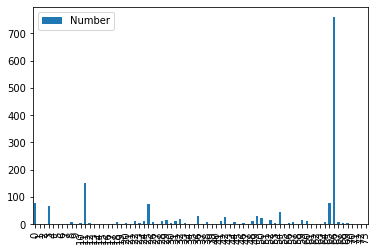

In [48]:
df11.plot(kind='bar')

In [49]:
df11.sort_values('Number')

,0,Number
73,50. Lord Help Me.',1
43,'Norway',1
55,'Sweden',1
39,'Namibia',1
35,'Macau',1
...,...,...
25,'India',75
65,'United Kingdom',77
0,"""People's Republic of China""",79
11,'Canada',149


In [91]:
from geopy.geocoders import Nominatim

In [92]:
nom=Nominatim(timeout=10)

In [93]:
df11["Coordinates"]=df11[0].apply(nom.geocode)
df11

,0,Number,Coordinates
0,"""People's Republic of China""",79,"(中国, (35.000074, 104.999927))"
1,'',2,None
2,'Argentina',1,"(Argentina, (-34.9964963, -64.9672817))"
3,'Australia',68,"(Australia, (-24.7761086, 134.755))"
4,'Bangladesh',1,"(বাংলাদেশ, (24.4768783, 90.2932426))"
...,...,...,...
69,'Vietnam',4,"(Việt Nam, (13.2904027, 108.4265113))"
70,'Virgin Islands,1,"(British Virgin Islands, (18.4024395, -64.5661..."
71,'Zambia',1,"(Zambia, (-14.5189121, 27.5589884))"
72,'Zimbabwe',2,"(Zimbabwe, (-19.01688, 29.35365015971339))"


In [94]:
df11

,0,Number,Coordinates
0,"""People's Republic of China""",79,"(中国, (35.000074, 104.999927))"
1,'',2,None
2,'Argentina',1,"(Argentina, (-34.9964963, -64.9672817))"
3,'Australia',68,"(Australia, (-24.7761086, 134.755))"
4,'Bangladesh',1,"(বাংলাদেশ, (24.4768783, 90.2932426))"
...,...,...,...
69,'Vietnam',4,"(Việt Nam, (13.2904027, 108.4265113))"
70,'Virgin Islands,1,"(British Virgin Islands, (18.4024395, -64.5661..."
71,'Zambia',1,"(Zambia, (-14.5189121, 27.5589884))"
72,'Zimbabwe',2,"(Zimbabwe, (-19.01688, 29.35365015971339))"


In [95]:
df12=df11.dropna()

In [96]:
df12

,0,Number,Coordinates
0,"""People's Republic of China""",79,"(中国, (35.000074, 104.999927))"
2,'Argentina',1,"(Argentina, (-34.9964963, -64.9672817))"
3,'Australia',68,"(Australia, (-24.7761086, 134.755))"
4,'Bangladesh',1,"(বাংলাদেশ, (24.4768783, 90.2932426))"
5,'Belgium',2,"(België / Belgique / Belgien, (50.6402809, 4.6..."
...,...,...,...
68,'Venezuela',3,"(Venezuela, (8.0018709, -66.1109318))"
69,'Vietnam',4,"(Việt Nam, (13.2904027, 108.4265113))"
70,'Virgin Islands,1,"(British Virgin Islands, (18.4024395, -64.5661..."
71,'Zambia',1,"(Zambia, (-14.5189121, 27.5589884))"


In [97]:
df12["Latitude"]=df12["Coordinates"].apply(lambda x: x.latitude)
df12["Longitude"]=df12["Coordinates"].apply(lambda x: x.longitude)

<ipython-input-97-6b5ca6de1eba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12["Latitude"]=df12["Coordinates"].apply(lambda x: x.latitude)
<ipython-input-97-6b5ca6de1eba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12["Longitude"]=df12["Coordinates"].apply(lambda x: x.longitude)


In [98]:
df12

,0,Number,Coordinates,Latitude,Longitude
0,"""People's Republic of China""",79,"(中国, (35.000074, 104.999927))",35.000074,104.999927
2,'Argentina',1,"(Argentina, (-34.9964963, -64.9672817))",-34.996496,-64.967282
3,'Australia',68,"(Australia, (-24.7761086, 134.755))",-24.776109,134.755000
4,'Bangladesh',1,"(বাংলাদেশ, (24.4768783, 90.2932426))",24.476878,90.293243
5,'Belgium',2,"(België / Belgique / Belgien, (50.6402809, 4.6...",50.640281,4.666715
...,...,...,...,...,...
68,'Venezuela',3,"(Venezuela, (8.0018709, -66.1109318))",8.001871,-66.110932
69,'Vietnam',4,"(Việt Nam, (13.2904027, 108.4265113))",13.290403,108.426511
70,'Virgin Islands,1,"(British Virgin Islands, (18.4024395, -64.5661...",18.402439,-64.566164
71,'Zambia',1,"(Zambia, (-14.5189121, 27.5589884))",-14.518912,27.558988


In [99]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    df12, geometry=gpd.points_from_xy(df12.Longitude, df12.Latitude))

In [100]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

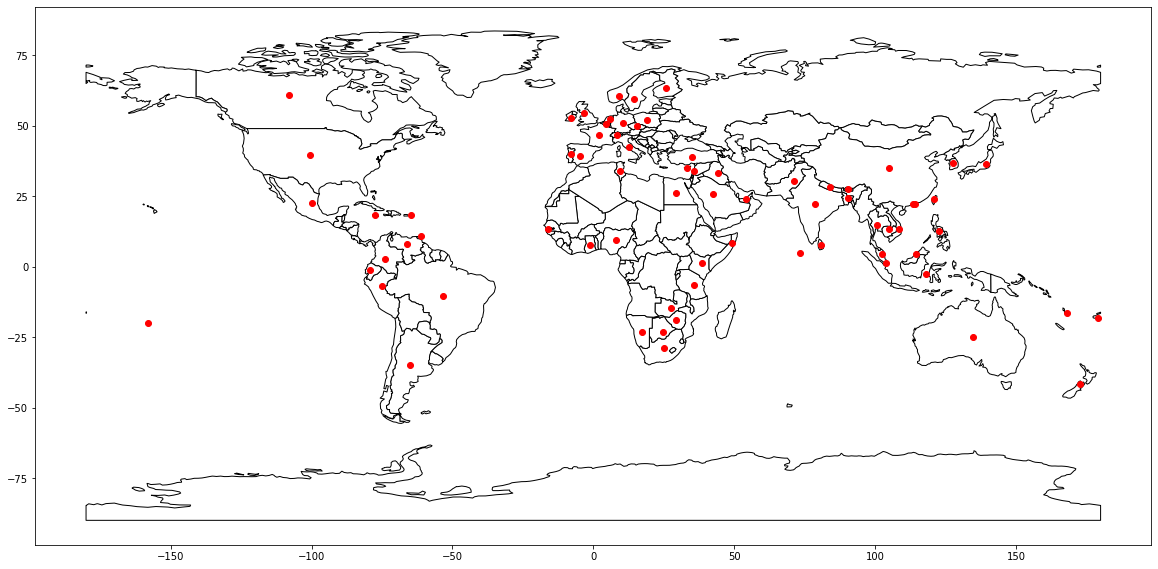

In [101]:
ax = world.plot(color='white', edgecolor='black',figsize=[20,10])
gdf.plot(ax=ax, color='red')


<AxesSubplot:>

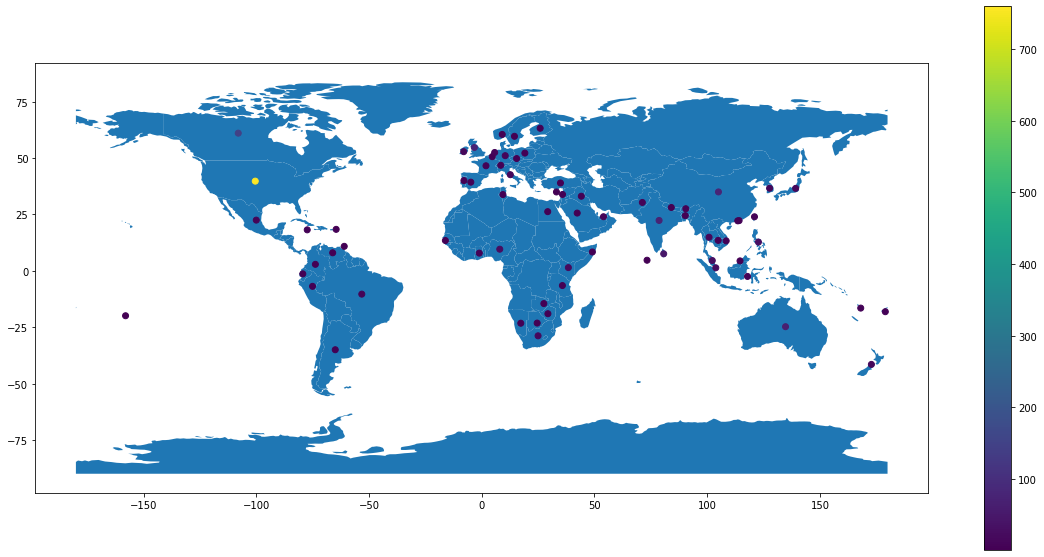

In [102]:
ax = world.plot(figsize=[20,10])
gdf.plot(ax=ax,column='Number',legend='True')

In [103]:
gdf.crs = {'init' :'epsg:4326'}

/home/makavelli/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [104]:
gdf.to_crs(world.crs,inplace=True)

In [105]:
world_and_points=gpd.sjoin(world,gdf)

<AxesSubplot:>

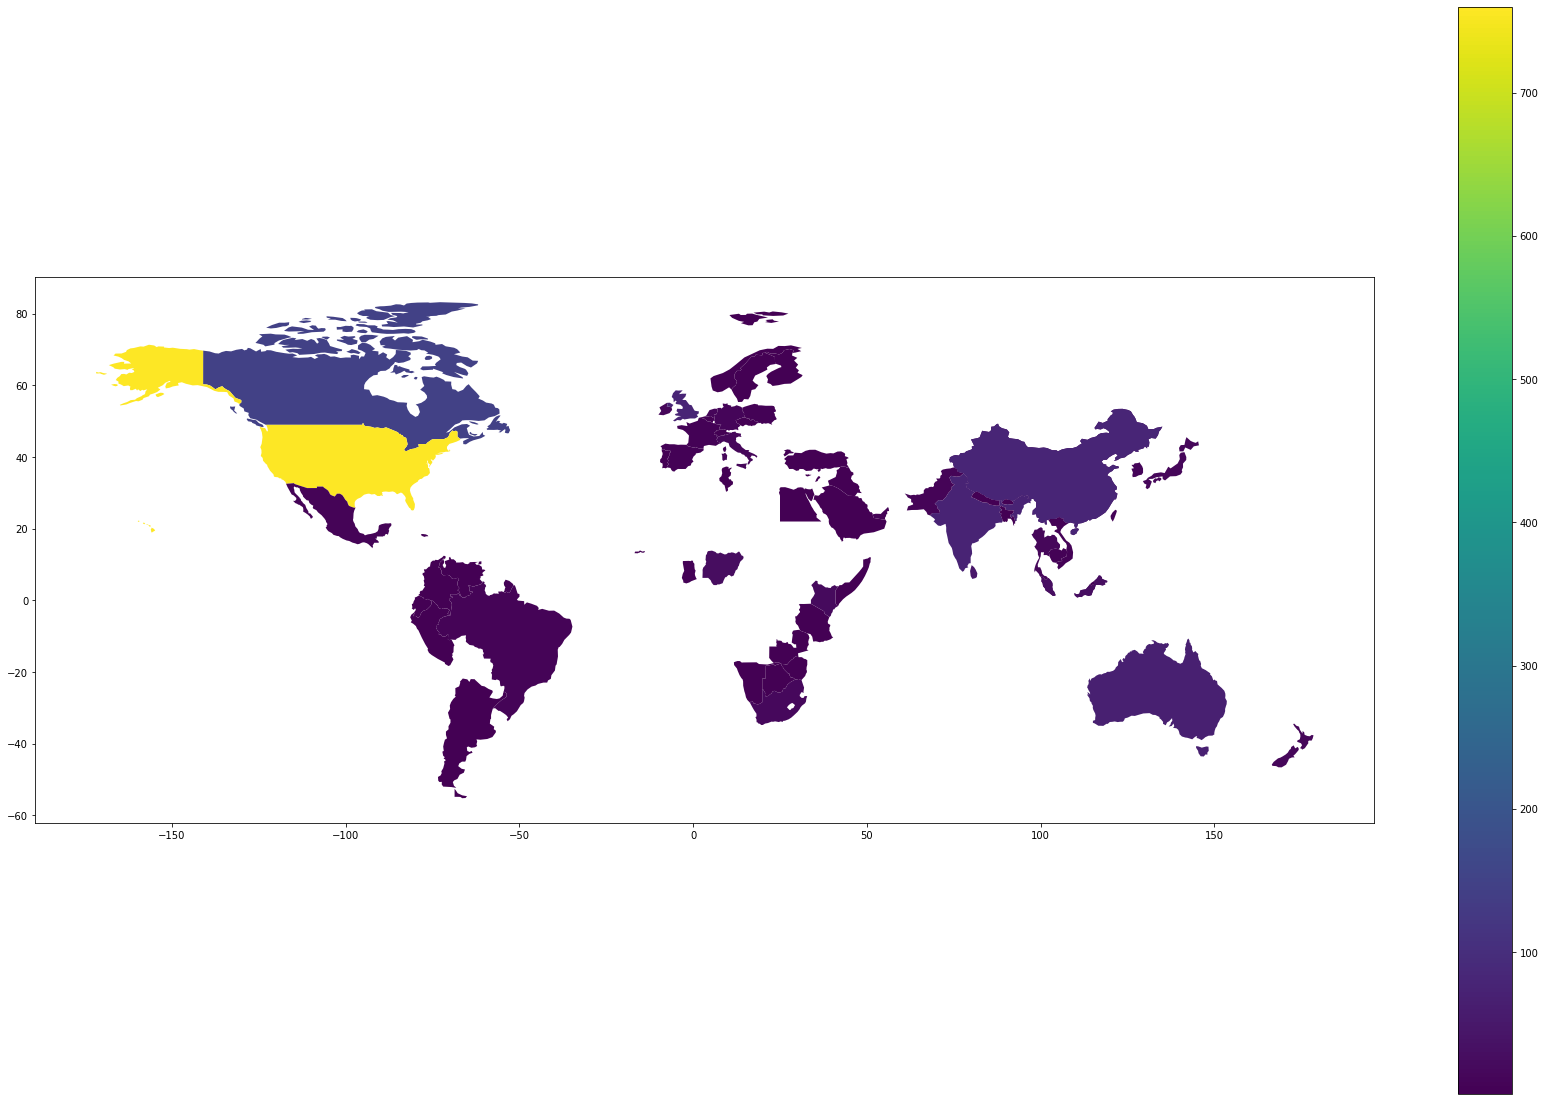

In [106]:
world_and_points.plot(column='Number',legend='True',figsize=[30,20])

/home/makavelli/.local/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


<AxesSubplot:>

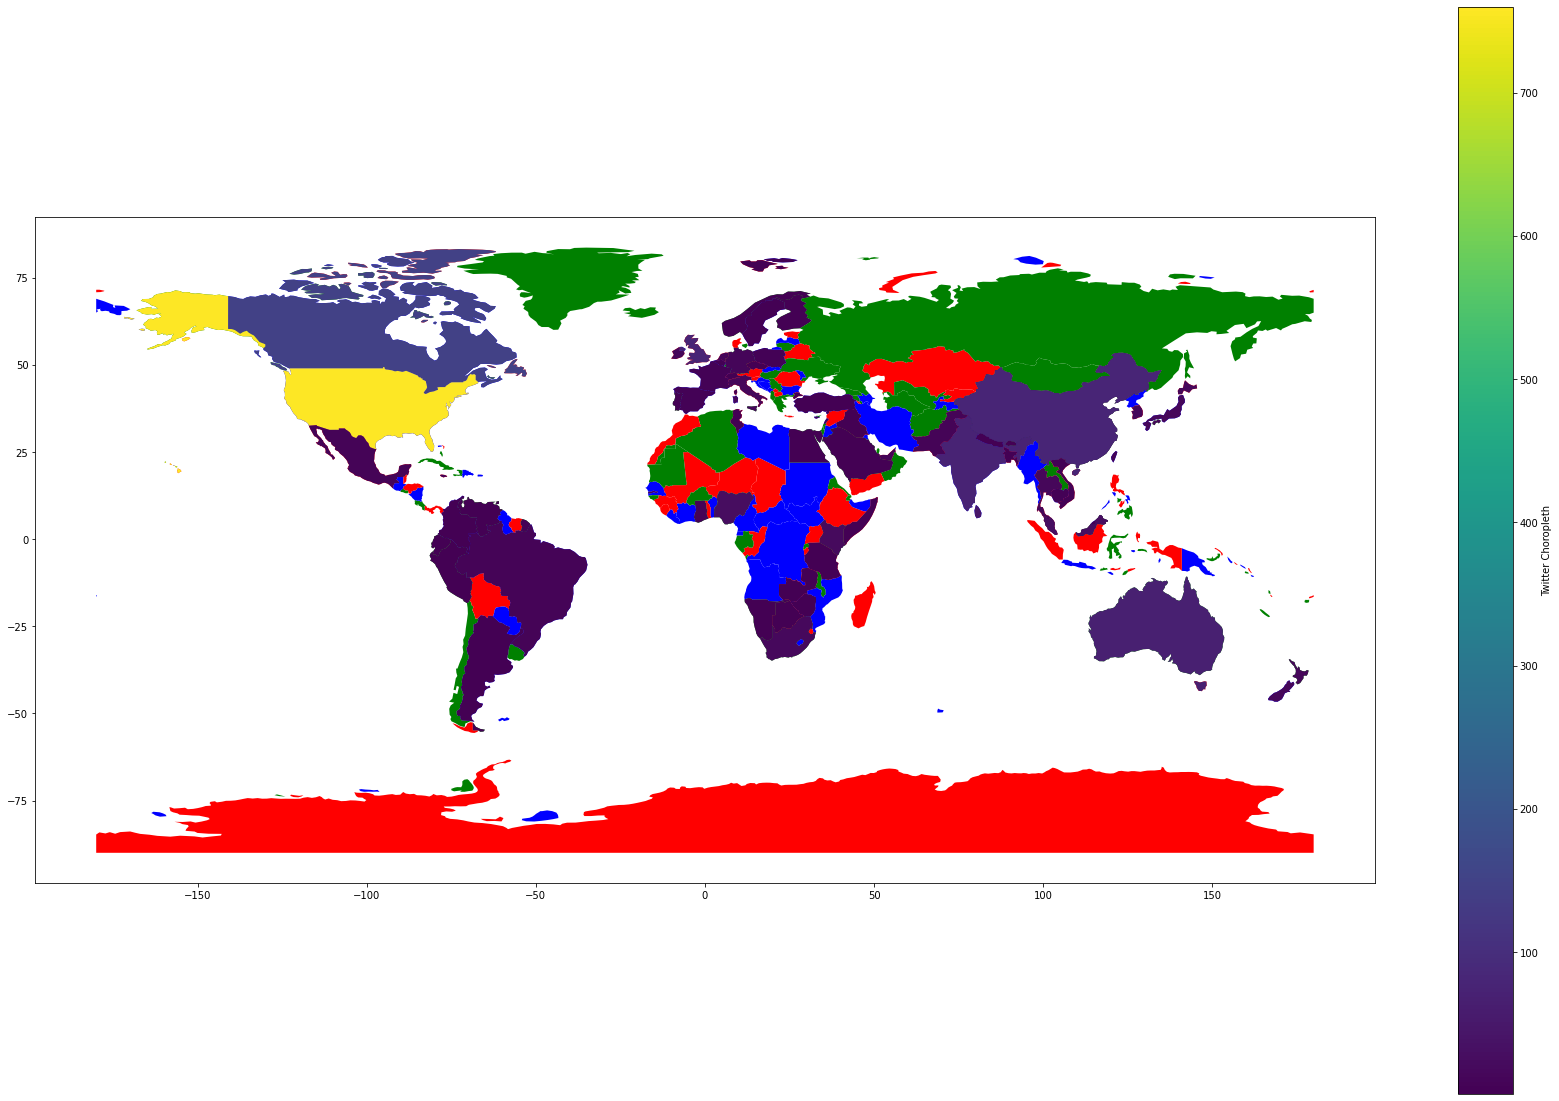

In [109]:
ax = world.plot(figsize=[30,20],color='rgb')
world_and_points.plot(ax=ax,column='Number',legend='True', legend_kwds={'label': "Twitter Choropleth",
                           'orientation': "vertical"},figsize=[30,20])